In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and Exploratory data analysis

In [2]:
column_names=['pelvic_incidence','pelvic_tilt','lumbar_lordosis_angle','sacral_slope',' pelvic_radius','spondylolisthesis','Diagnosis']

In [3]:
df = pd.read_csv("../data/column_2C.dat",sep="\s+",
                 names=column_names)
df.index.names=["Index"]
#converting AB=1 and NO = 0
df["Diagnosis"]=df["Diagnosis"].replace(["AB","NO"],[1,0])

In [4]:
df.head(3)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,spondylolisthesis,Diagnosis
Index,,,,,,,
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1


In [5]:
df.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', ' pelvic_radius', 'spondylolisthesis', 'Diagnosis'],
      dtype='object')

i. Make scatterplots of the independent variables in the dataset. Use color to
show Classes 0 and 1.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


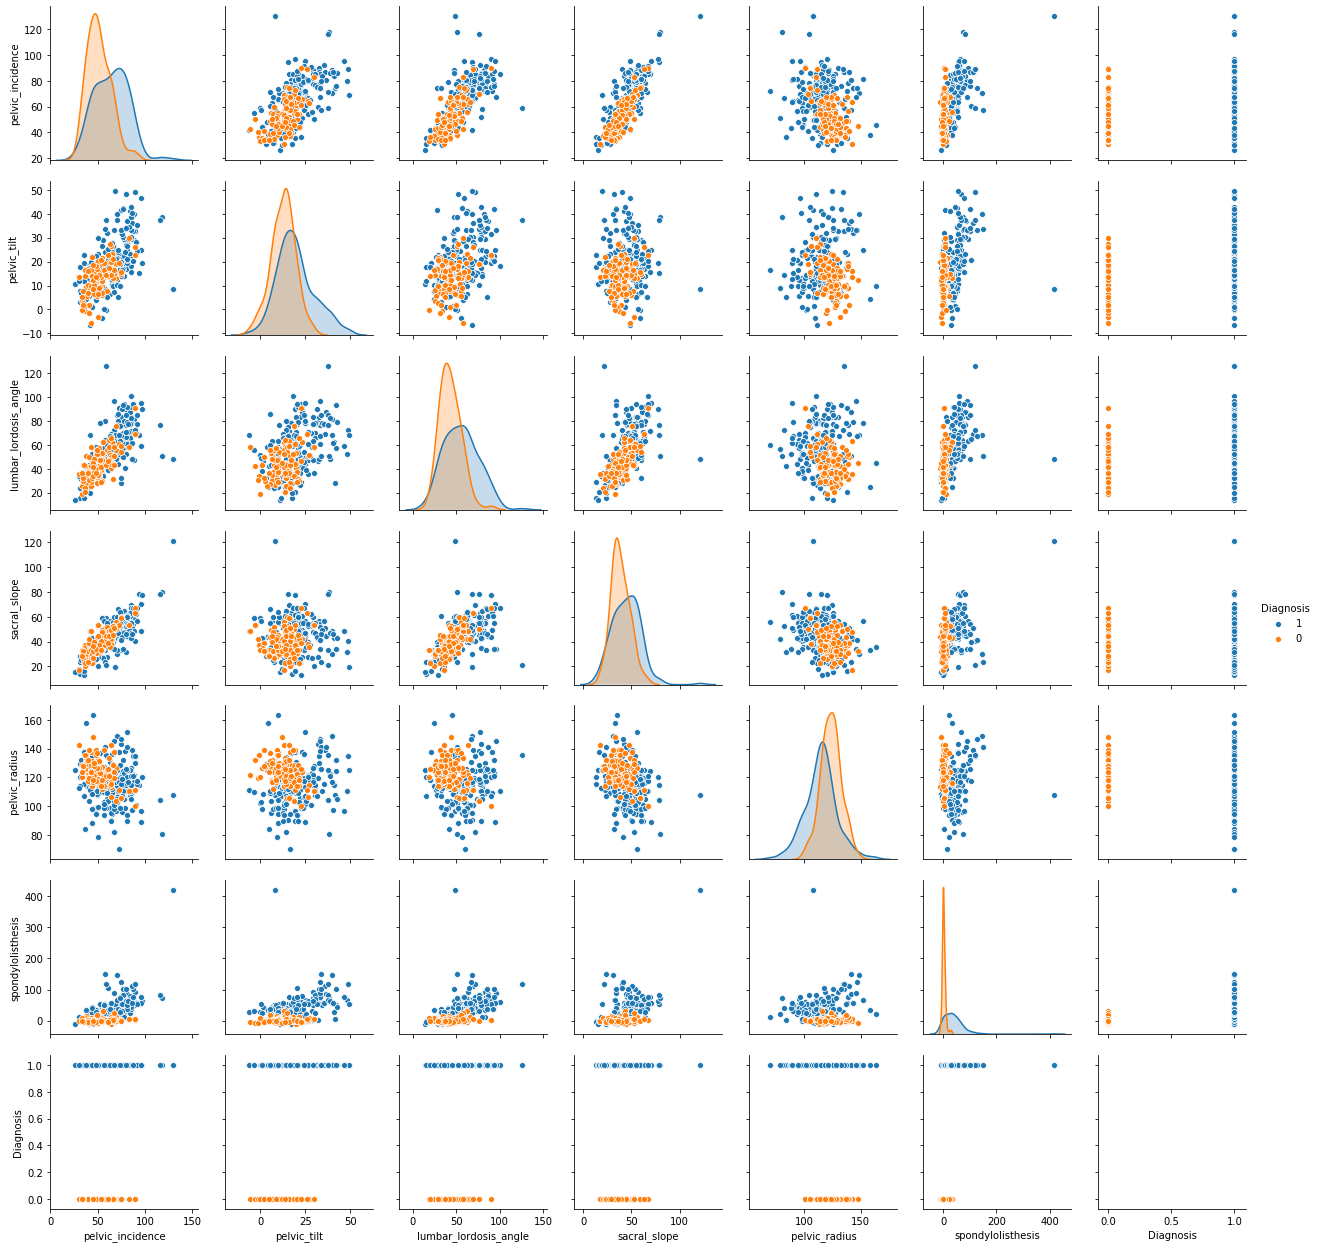

In [6]:
hue_order=[1,0]
sns.pairplot(data=df,hue="Diagnosis",hue_order=hue_order)

In [7]:
column_names

['pelvic_incidence',
 'pelvic_tilt',
 'lumbar_lordosis_angle',
 'sacral_slope',
 ' pelvic_radius',
 'spondylolisthesis',
 'Diagnosis']

ii. Make boxplots for each of the independent variables. Use color to show
Classes 0 and 1

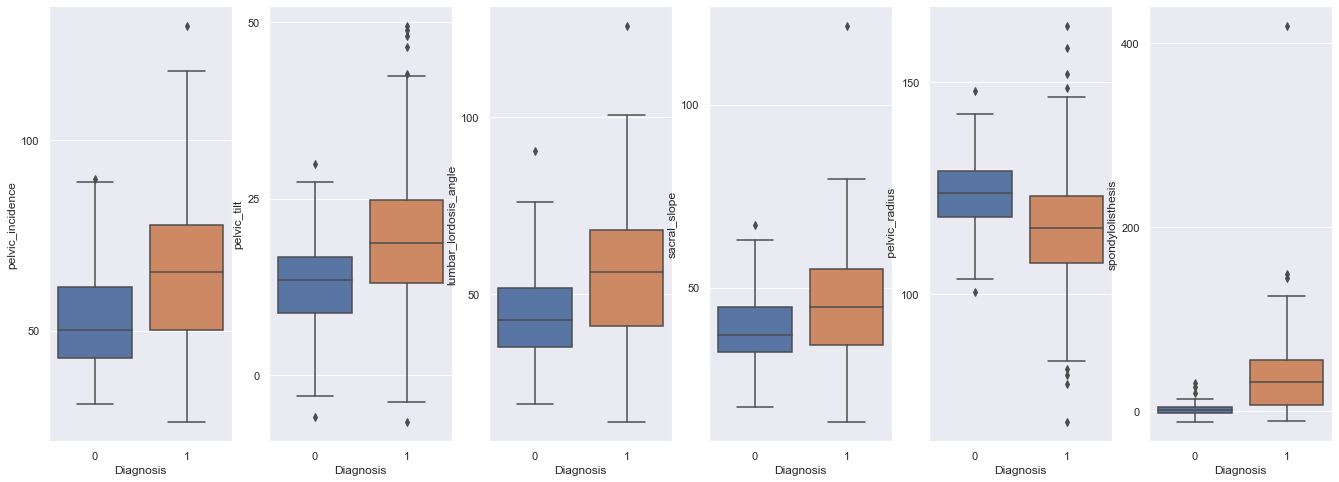

In [8]:
sns.set(rc={'figure.figsize':(23,8)})
fig, axes = plt.subplots(1, 6)
sns.set(font_scale = 5)
for i,col in enumerate(column_names[0:6]):    
    sns.boxplot(df["Diagnosis"],df[col],ax=axes[i])

plt.show()

(iii) Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the
training set and the rest of the data as the test set.

In [9]:
df_train=df.iloc[0:140] 
df_train=df_train.append(df.iloc[210:280])

df_test=df.iloc[140:210]
df_test=df_test.append(df.iloc[280:])

Shuffling training and testing dataset

In [10]:
from sklearn.utils import shuffle
#df_train = shuffle(df_train)
#df_test = shuffle(df_test)


In [11]:
df_train.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,spondylolisthesis,Diagnosis
Index,,,,,,,
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1


In [12]:
X_train = df_train.iloc[:,:-1].values
y_train = df_train.iloc[:,-1].values

X_test = df_test.iloc[:,:-1].values
y_test = df_test.iloc[:,-1].values


# Classification using KNN

i. Write code for k-nearest neighbors with Euclidean metric (or use a software
package).

ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for
 k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller
increments of k. Which k
∗
is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision,
and F1-score when k = k*


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [14]:
k=np.arange(1,210,3)
print(k)

[  1   4   7  10  13  16  19  22  25  28  31  34  37  40  43  46  49  52
  55  58  61  64  67  70  73  76  79  82  85  88  91  94  97 100 103 106
 109 112 115 118 121 124 127 130 133 136 139 142 145 148 151 154 157 160
 163 166 169 172 175 178 181 184 187 190 193 196 199 202 205 208]


In [15]:
def KNN(k,metric):
    classifier = KNeighborsClassifier(n_neighbors=k,metric=metric)
    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    training_error = mean_squared_error(y_train,classifier.predict(X_train))
    testing_error=mean_squared_error(y_test,y_pred)
    return training_error,testing_error,classifier
    

In [16]:
training_error=[]
testing_error=[]

for n in k:
    train_err,test_err,_=KNN(n,"euclidean")
    training_error.append(train_err)
    testing_error.append(test_err)

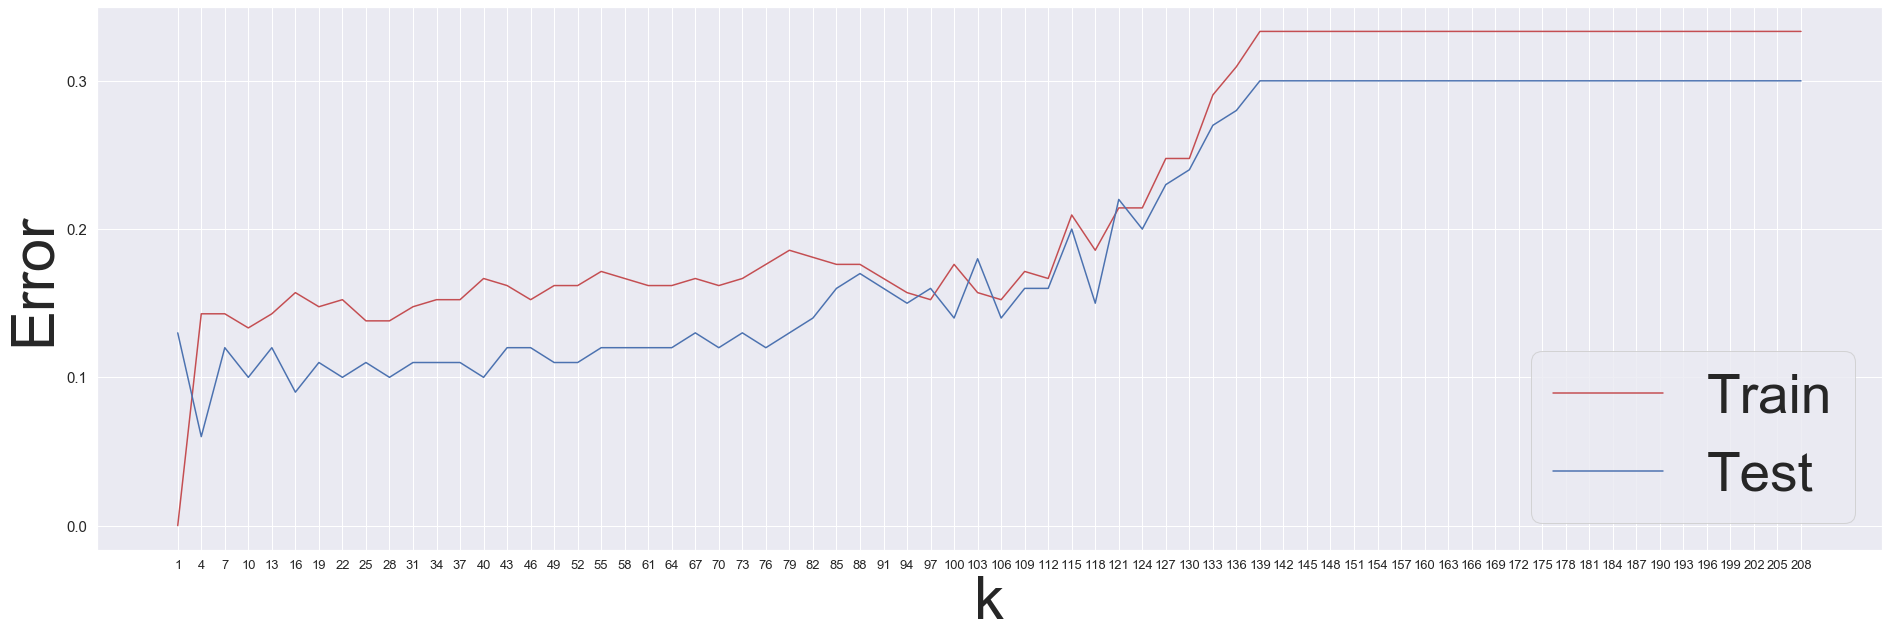

In [17]:
training_error=np.array(training_error)
testing_error=np.array(testing_error)

plt.rcParams["figure.figsize"] = (32,10)
plt.plot(k,training_error,"r",label="Train")
plt.plot(k,testing_error,label="Test")
plt.xticks(k,fontsize=13)
plt.yticks(fontsize=15)
plt.xlabel("k")
plt.ylabel("Error")
plt.legend(loc='lower right')

Zooming on the k value range from 1 to 40 as the error increases for k>40

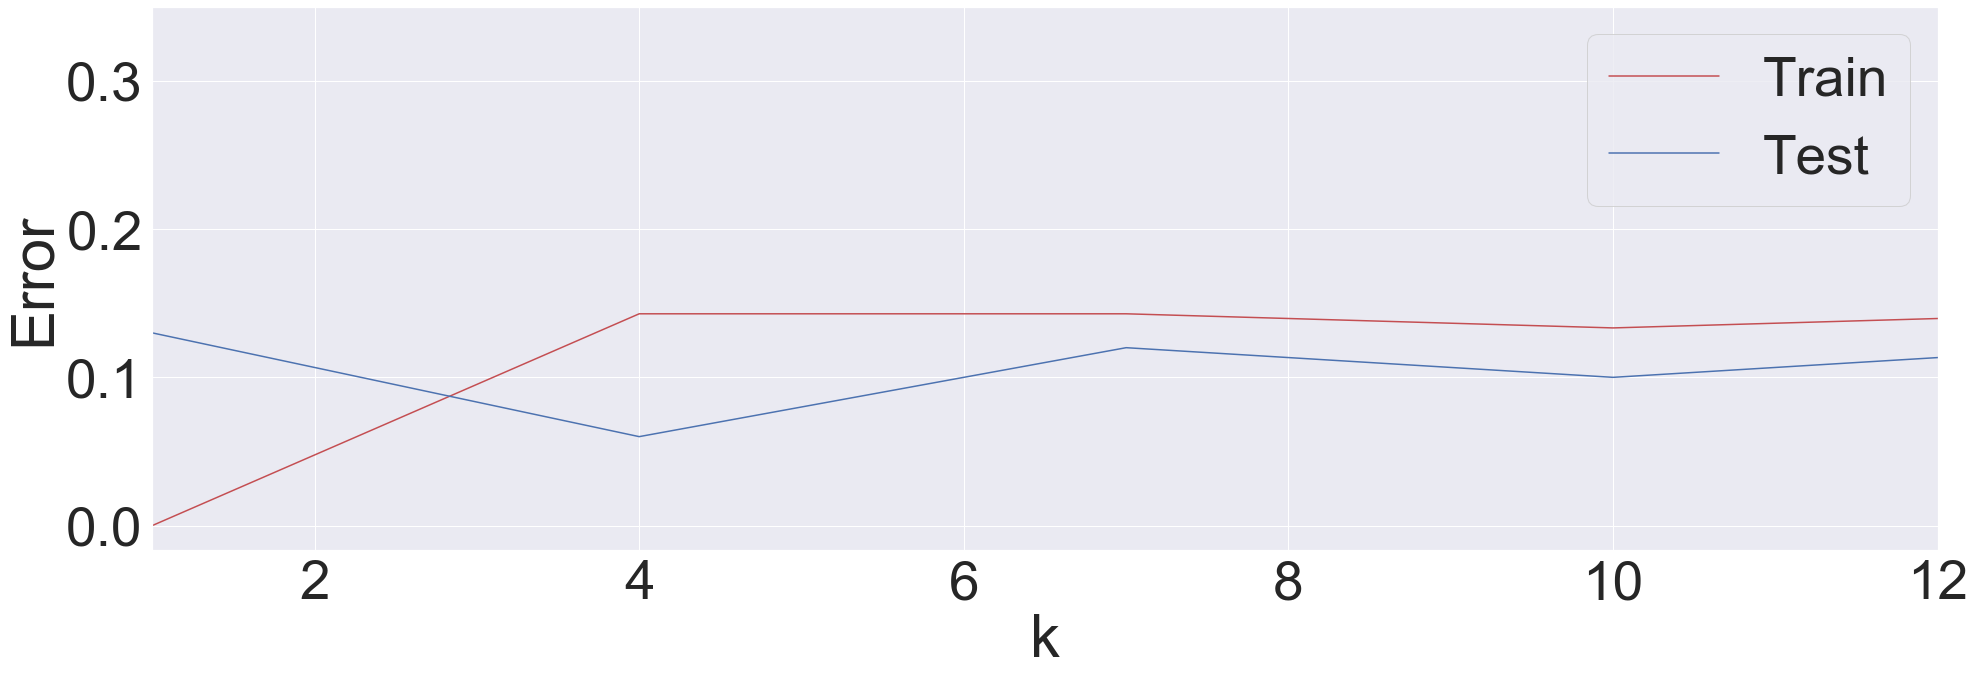

In [18]:
plt.rcParams["figure.figsize"] = (32,10)
plt.plot(k,training_error,"r",label="Train")
plt.plot(k,testing_error,label="Test")
plt.xlim([1,12])
# plt.xticks(k,fontsize=13)
# plt.yticks(fontsize=15)
plt.xlabel("k")
plt.ylabel("Error")
plt.legend(loc='upper right')

going from the test train error results, k=3 has low test and train error

In [19]:
train_err,test_err,classifier= KNN(3,"euclidean")

In [20]:
print(f"Training error is {train_err} and test error is {test_err}")

Training error is 0.10476190476190476 and test error is 0.08


In [21]:
error_dict={"Test_Error":[test_err],"Distance_metric":"Euclidean","k":[3]}

error_df= pd.DataFrame(data=error_dict)
error_df

,Test_Error,Distance_metric,k
0,0.08,Euclidean,3


Confusion Matrix:
[[23  7]
 [ 1 69]]


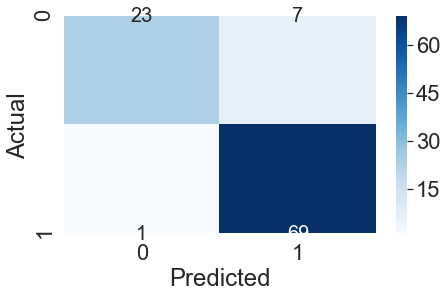

In [22]:
y_pred=classifier.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(cm)

df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (7,4))
sns.set(font_scale=2)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 20})# font size


In [23]:
print(f"True Positive rate: {cm[0][0]/(cm[0][0]+cm[1][0])}")
print(f"True Negative rate: {cm[1][1]/(cm[0][1]+cm[1][1])}")
print(f"Precision score:{precision_score(y_test, y_pred)}")
print(f"F1 score:{f1_score(y_test, y_pred)}")

True Positive rate: 0.9583333333333334
True Negative rate: 0.9078947368421053
Precision score:0.9078947368421053
F1 score:0.9452054794520548


iii. Since the computation time depends on the size of the training set, one may
only use a subset of the training set. Plot the best test error rate,
3 which
is obtained by some value of k, against the size of training set, when the
size of training set is N ∈ {10, 20, 30, . . . , 210}.
4 Note: for each N, select
your training set by choosing the first bN/3c rows of Class 0 and the first
N − bN/3c rows of Class 1 in the training set you created in 7(b)iii. Also, for
each N, select the optimal k from a set starting from k = 1, increasing by 5.
For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}.
This plot is called a Learning Curve.

In [24]:
N= np.arange(10,211,10)

In [25]:
N

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210])

In [26]:
df_train_1=df_train[df_train["Diagnosis"]==1]
df_train_0=df_train[df_train["Diagnosis"]==0]

Best Error rate for N=10 is 0.25 with k=1
Best Error rate for N=20 is 0.2 with k=6
Best Error rate for N=30 is 0.22 with k=1
Best Error rate for N=40 is 0.25 with k=11
Best Error rate for N=50 is 0.3 with k=26
Best Error rate for N=60 is 0.29 with k=21
Best Error rate for N=70 is 0.29 with k=26
Best Error rate for N=80 is 0.29 with k=31
Best Error rate for N=90 is 0.29 with k=41
Best Error rate for N=100 is 0.25 with k=6
Best Error rate for N=110 is 0.22 with k=6
Best Error rate for N=120 is 0.17 with k=16
Best Error rate for N=130 is 0.16 with k=16
Best Error rate for N=140 is 0.15 with k=16
Best Error rate for N=150 is 0.13 with k=16
Best Error rate for N=160 is 0.13 with k=6
Best Error rate for N=170 is 0.13 with k=6
Best Error rate for N=180 is 0.1 with k=6
Best Error rate for N=190 is 0.09 with k=6
Best Error rate for N=200 is 0.09 with k=6
Best Error rate for N=210 is 0.08 with k=6


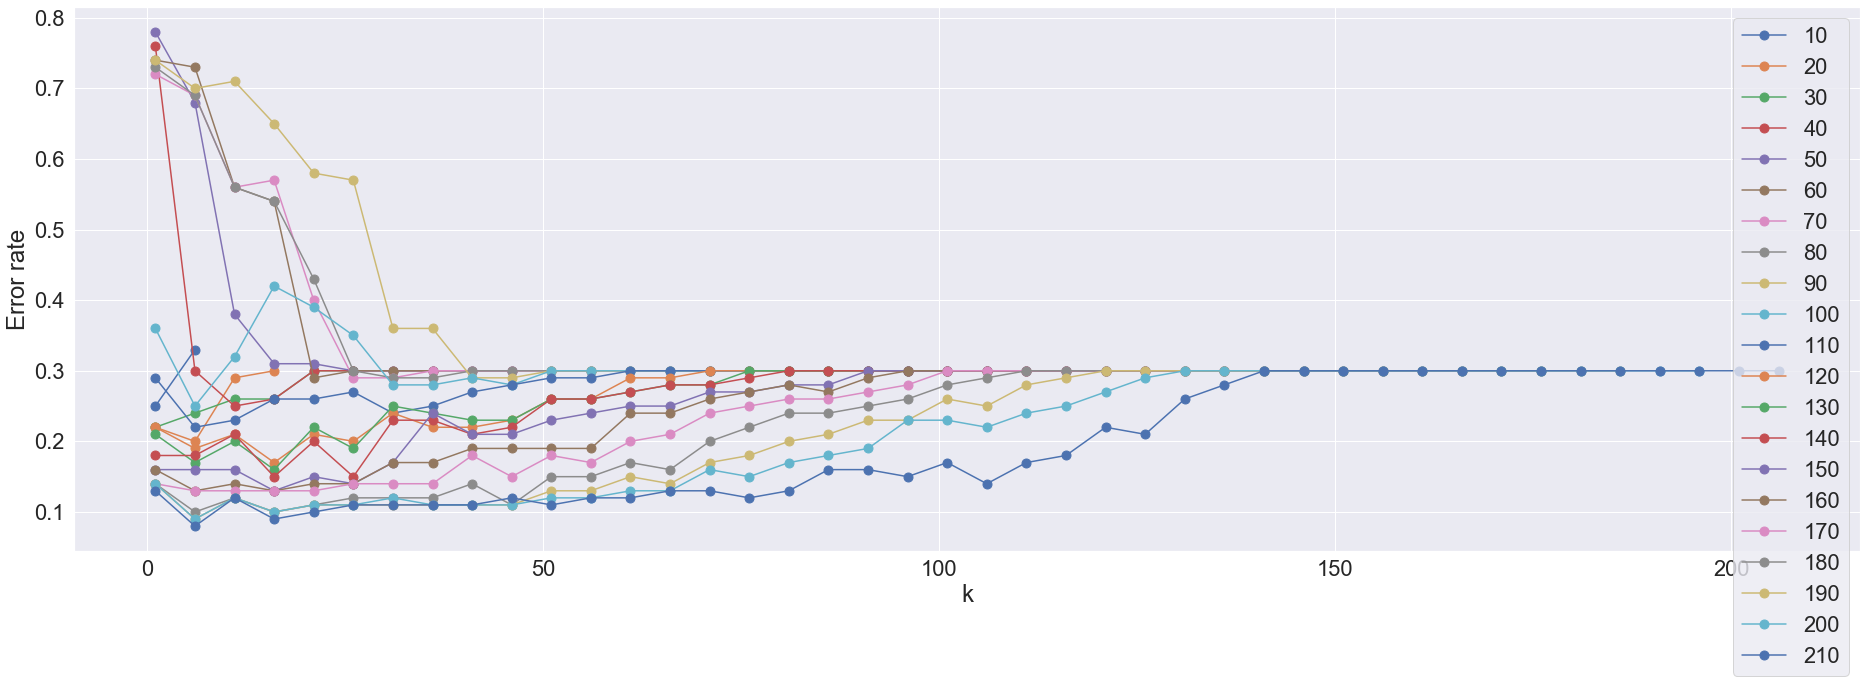

In [27]:
X_train2=[]
y_train2=[]


for n in N:
    df_temp=[]
    error_rate=[]
    temp=[]
    df_temp=df_train_0.iloc[0:int(n/3),:]
    df_temp=df_temp.append(df_train_1.iloc[0:(n-int(n/3)),:])
    X_train2 = df_temp.iloc[:,:-1].values
    y_train2 = df_temp.iloc[:,-1].values
    for i in range(1,n,5):
        classifier = KNeighborsClassifier(n_neighbors=i,metric="euclidean")
        classifier.fit(X_train2,y_train2)
        y_pred2 = classifier.predict(X_test)
        error_rate.append(np.mean(y_pred2 != y_test))
        temp.append(i)
    
    e=error_rate.index(min(error_rate))
    
    print(f"Best Error rate for N={n} is {min(error_rate)} with k={temp[e]}")
    plt.plot(range(1,n,5),error_rate, marker='o', markersize=9,label=str(n))
    plt.xlabel("k")
    plt.ylabel("Error rate")
    plt.legend(loc='upper right')
    
    

Replace the Euclidean metric with the following metrics5 and test them. Summarize the test errors (i.e., when k = k
∗
) in a table. Use all of your training data
and select the best k when {1, 6, 11, . . . , 196}. (10 pts)

### i. Minkowski Distance:

### A. which becomes Manhattan Distance with p = 1.

In [28]:
k2=np.arange(1,197,5)
training_error2=[]
testing_error2=[]

for i in k2:
    train_err,test_err,_=KNN(i,"manhattan")
    training_error2.append(train_err)
    testing_error2.append(test_err)   

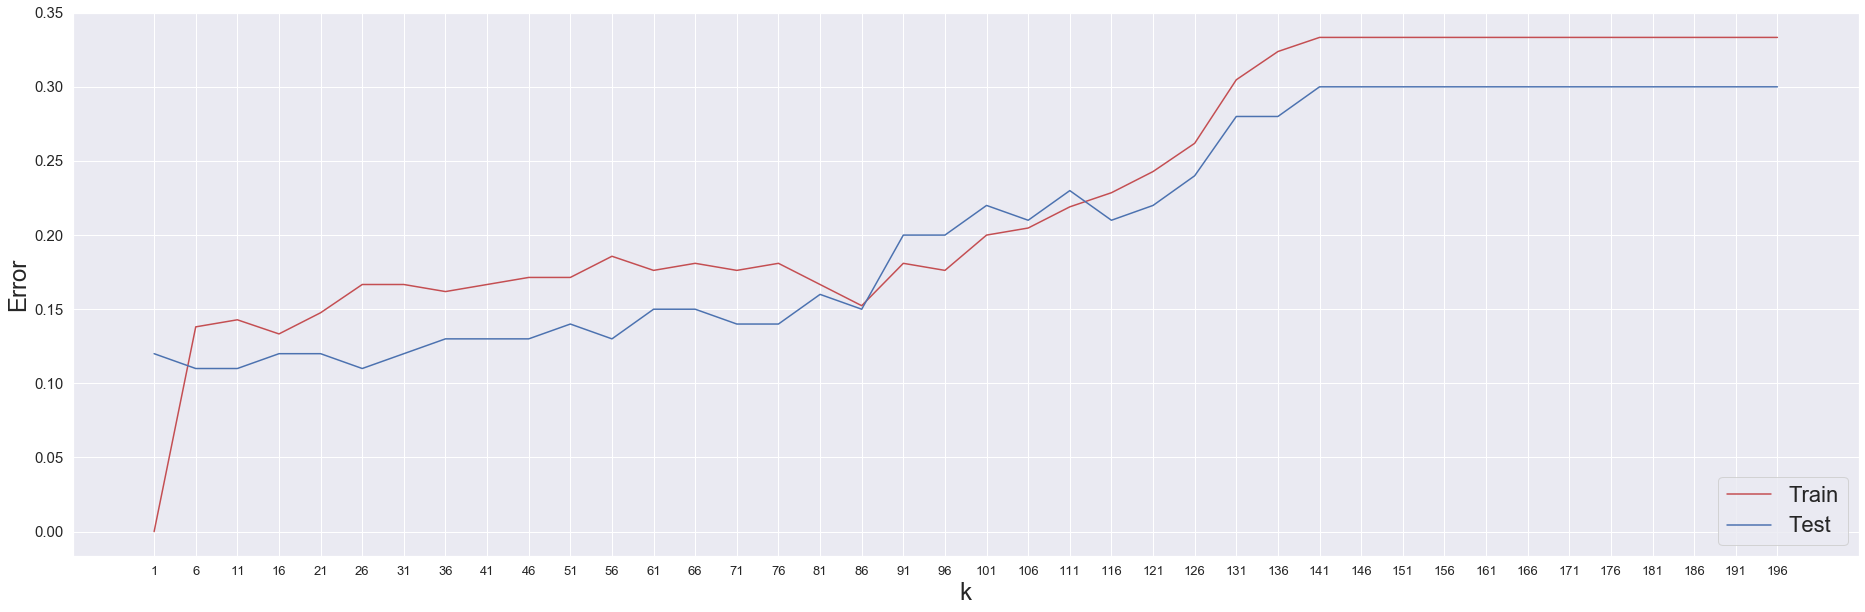

In [29]:
plt.rcParams["figure.figsize"] = (32,10)
plt.plot(k2,training_error2,"r",label="Train")
plt.plot(k2,testing_error2,label="Test")
plt.xticks(k2,fontsize=13)
plt.yticks(fontsize=15)
plt.xlabel("k")
plt.ylabel("Error")
plt.legend(loc='lower right')

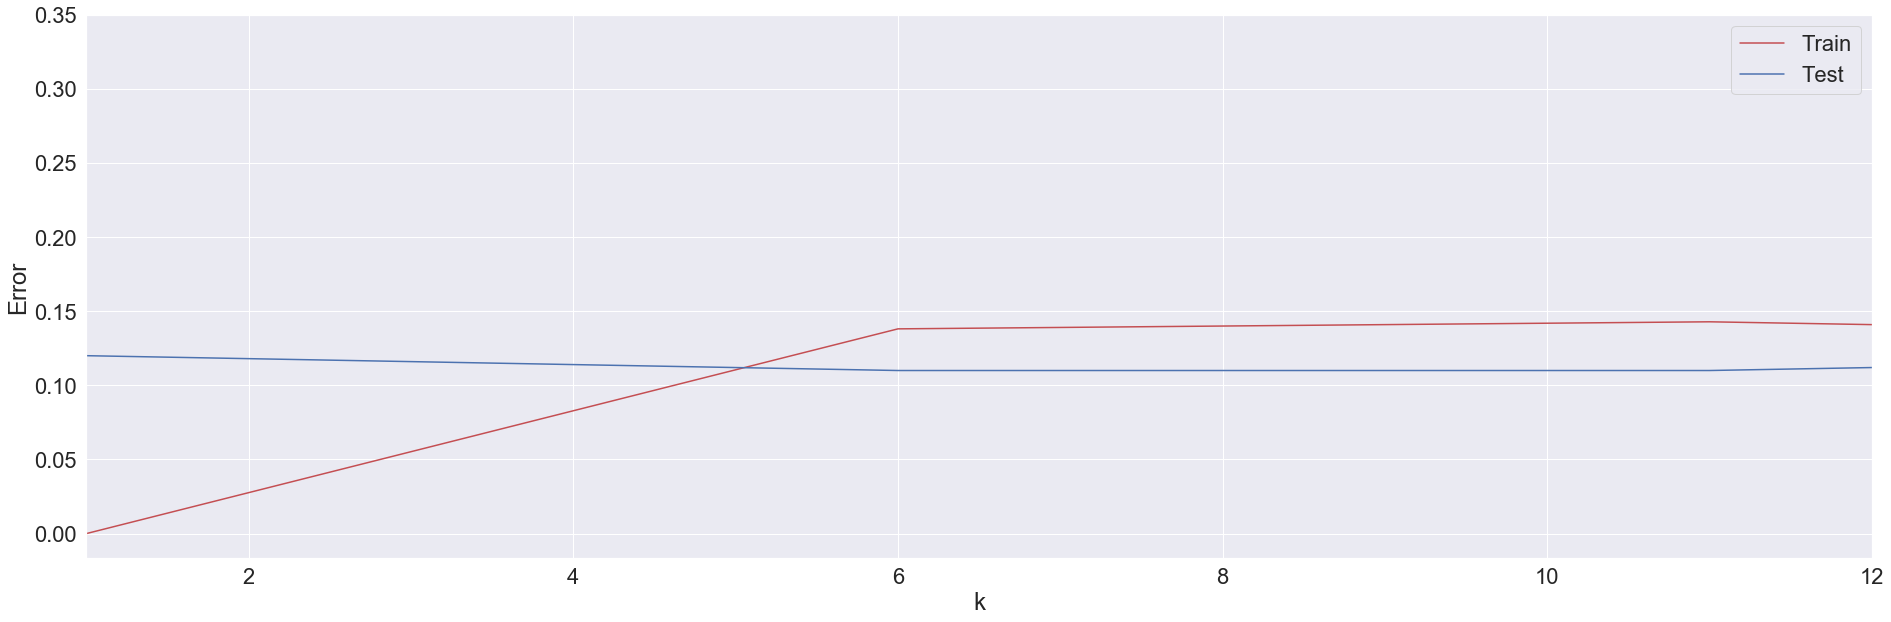

In [30]:
plt.rcParams["figure.figsize"] = (32,10)
plt.plot(k2,training_error2,"r",label="Train")
plt.plot(k2,testing_error2,label="Test")
plt.xlim([1,12])
# plt.xticks(k,fontsize=13)
# plt.yticks(fontsize=15)
plt.xlabel("k")
plt.ylabel("Error")
plt.legend(loc='upper right')

The best k for manhattan distance is at k=5 where both train and test error are minimum

In [31]:
train_err2,test_err2,classifier2=KNN(5,"manhattan")

print(f"Training error is {train_err2} and test error is {test_err2} with k=5")

Training error is 0.12380952380952381 and test error is 0.11 with k=5


In [32]:
error_dict["Test Error"]=test_err2
error_dict["Distance metric"]="manhattan"
error_dict["k"]=5

In [33]:
error_dict2={"Test_Error":test_err2,"Distance_metric":"Manhattan","k":5}



In [34]:
error_df=error_df.append(error_dict2,ignore_index=True)
error_df

,Test_Error,Distance_metric,k
0,0.08,Euclidean,3
1,0.11,Manhattan,5


### B. with log10(p) ∈ {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k you found for the Manhattan distance in 7(d)iA. What is the best log10(p)?

In [35]:
p_pow = np.arange(0.1,1.1,0.1)
p = [10**i for i in p_pow]

In [36]:
p_pow

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [37]:
p

[1.2589254117941673,
 1.5848931924611136,
 1.9952623149688797,
 2.51188643150958,
 3.1622776601683795,
 3.9810717055349722,
 5.011872336272724,
 6.309573444801933,
 7.943282347242816,
 10.0]

In [38]:
#we will be using k=3
from sklearn.metrics import f1_score
classifier = KNeighborsClassifier(n_neighbors=3)

test_score_p = []
f1_score_p = []
for i in p:
    classifier.set_params(p=i)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    test_score_p.append(mean_squared_error(y_test,y_pred))
    f1_score_p.append(f1_score(y_test, y_pred))
    
    

In [39]:
test_score_p

[0.1, 0.1, 0.08, 0.11, 0.1, 0.11, 0.11, 0.11, 0.11, 0.12]

In [40]:
f1_score_p

[0.9324324324324325,
 0.9324324324324325,
 0.9452054794520548,
 0.9261744966442954,
 0.9315068493150684,
 0.9251700680272108,
 0.9251700680272108,
 0.9251700680272108,
 0.9251700680272108,
 0.9189189189189189]

The best log10(p) is 0.3 with test error = 0.08

### C. which becomes Chebyshev Distance with p → ∞

In [41]:
#k2=np.arange(1,197,5)
training_error_cheby=[]
testing_error_cheby=[]
test_score_cheby=[]
f1_score_cheby=[]
for i in k2:
    train_err,test_err,classifier_cheby=KNN(i,"chebyshev")
    training_error_cheby.append(train_err)
    testing_error_cheby.append(test_err)
    y_pred = classifier_cheby.predict(X_test)
    test_score_cheby.append(mean_squared_error(y_test,y_pred))
    f1_score_cheby.append(f1_score(y_test, y_pred))
    

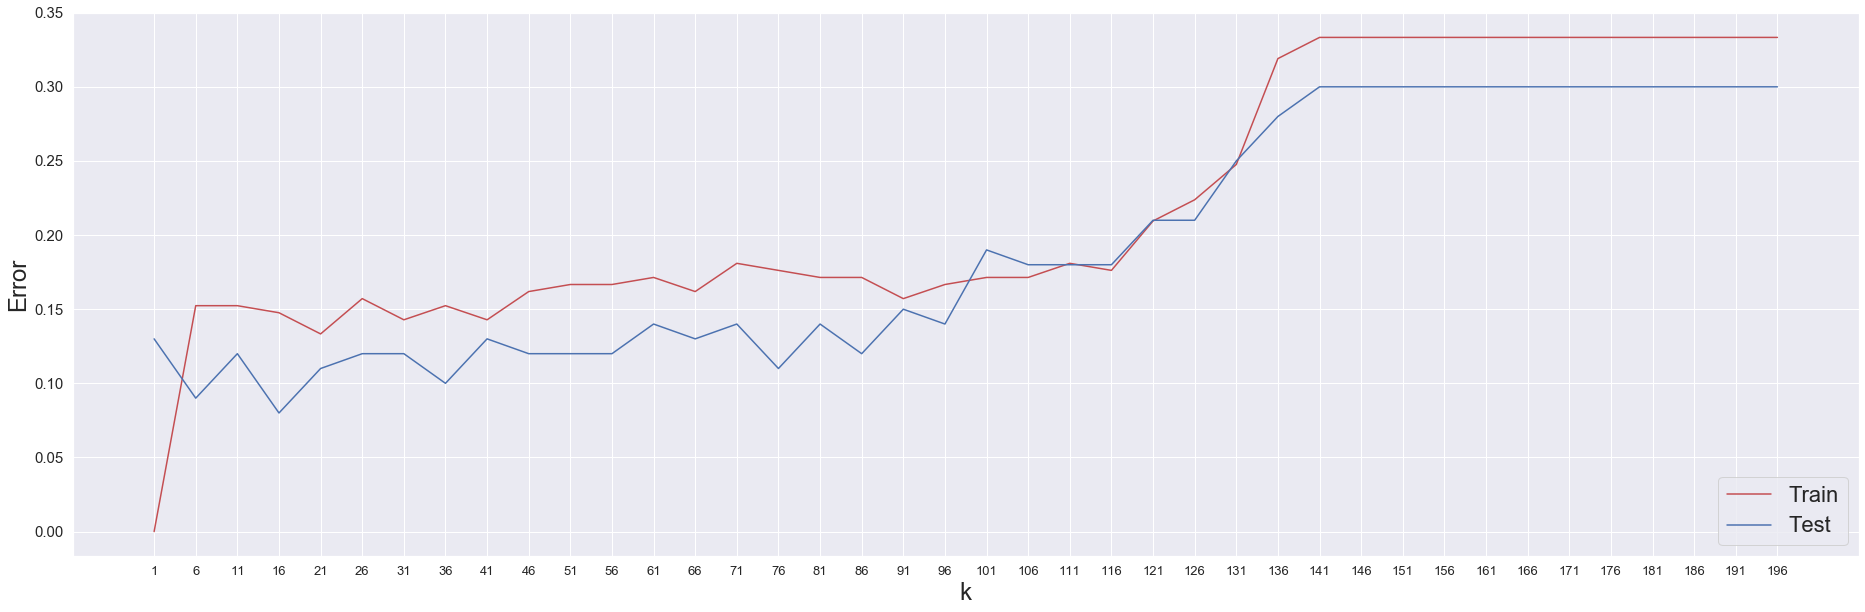

In [42]:
plt.rcParams["figure.figsize"] = (32,10)
plt.plot(k2,training_error_cheby,"r",label="Train")
plt.plot(k2,testing_error_cheby,label="Test")
plt.xticks(k2,fontsize=13)
plt.yticks(fontsize=15)
plt.xlabel("k")
plt.ylabel("Error")
plt.legend(loc='lower right')

In [43]:
f1_score_cheby

[0.9115646258503401,
 0.9387755102040817,
 0.9210526315789475,
 0.945945945945946,
 0.9261744966442954,
 0.9200000000000002,
 0.9200000000000002,
 0.9324324324324325,
 0.9139072847682119,
 0.9200000000000002,
 0.9200000000000002,
 0.9200000000000002,
 0.9078947368421053,
 0.9139072847682119,
 0.9078947368421053,
 0.9261744966442954,
 0.9078947368421053,
 0.9200000000000002,
 0.9019607843137254,
 0.9078947368421053,
 0.8789808917197452,
 0.8846153846153846,
 0.8846153846153846,
 0.8846153846153846,
 0.8679245283018868,
 0.8695652173913044,
 0.8484848484848484,
 0.8333333333333333,
 0.8235294117647058,
 0.8235294117647058,
 0.8235294117647058,
 0.8235294117647058,
 0.8235294117647058,
 0.8235294117647058,
 0.8235294117647058,
 0.8235294117647058,
 0.8235294117647058,
 0.8235294117647058,
 0.8235294117647058,
 0.8235294117647058]

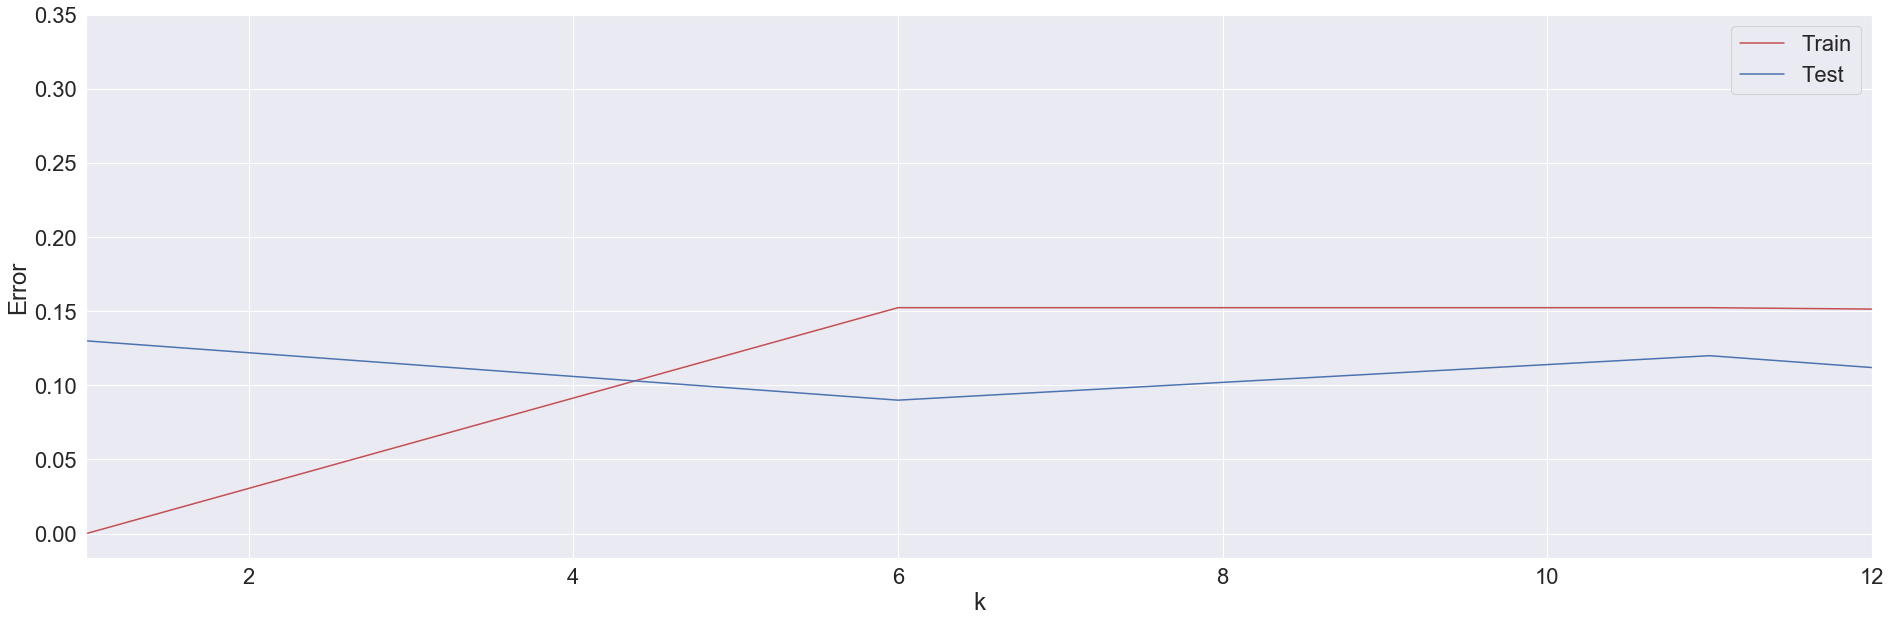

In [44]:
plt.rcParams["figure.figsize"] = (32,10)
plt.plot(k2,training_error_cheby,"r",label="Train")
plt.plot(k2,testing_error_cheby,label="Test")
plt.xlim([1,12])
# plt.xticks(k,fontsize=13)
# plt.yticks(fontsize=15)
plt.xlabel("k")
plt.ylabel("Error")
plt.legend(loc='upper right')

k=5 has the best train and test error

### ii. Mahalanobis Distance

In [45]:
classifier_mb = KNeighborsClassifier(metric='mahalanobis', 
                           algorithm='brute', 
                           metric_params={'V': np.cov(X_train)})

test_score_mb = []
for i in k2:
    classifier_mb.set_params(n_neighbors=i)
    classifier_mb.fit(X_train, y_train)
    y_pred= classifier_mb.predict(X_test)
    test_score_mb.append(mean_squared_error(y_test,y_pred))
    
    

In [46]:
print(test_score_mb)

[0.18, 0.16, 0.19, 0.2, 0.23, 0.21, 0.21, 0.23, 0.23, 0.24, 0.25, 0.26, 0.26, 0.26, 0.27, 0.27, 0.25, 0.27, 0.28, 0.26, 0.28, 0.29, 0.29, 0.29, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3, 0.3]


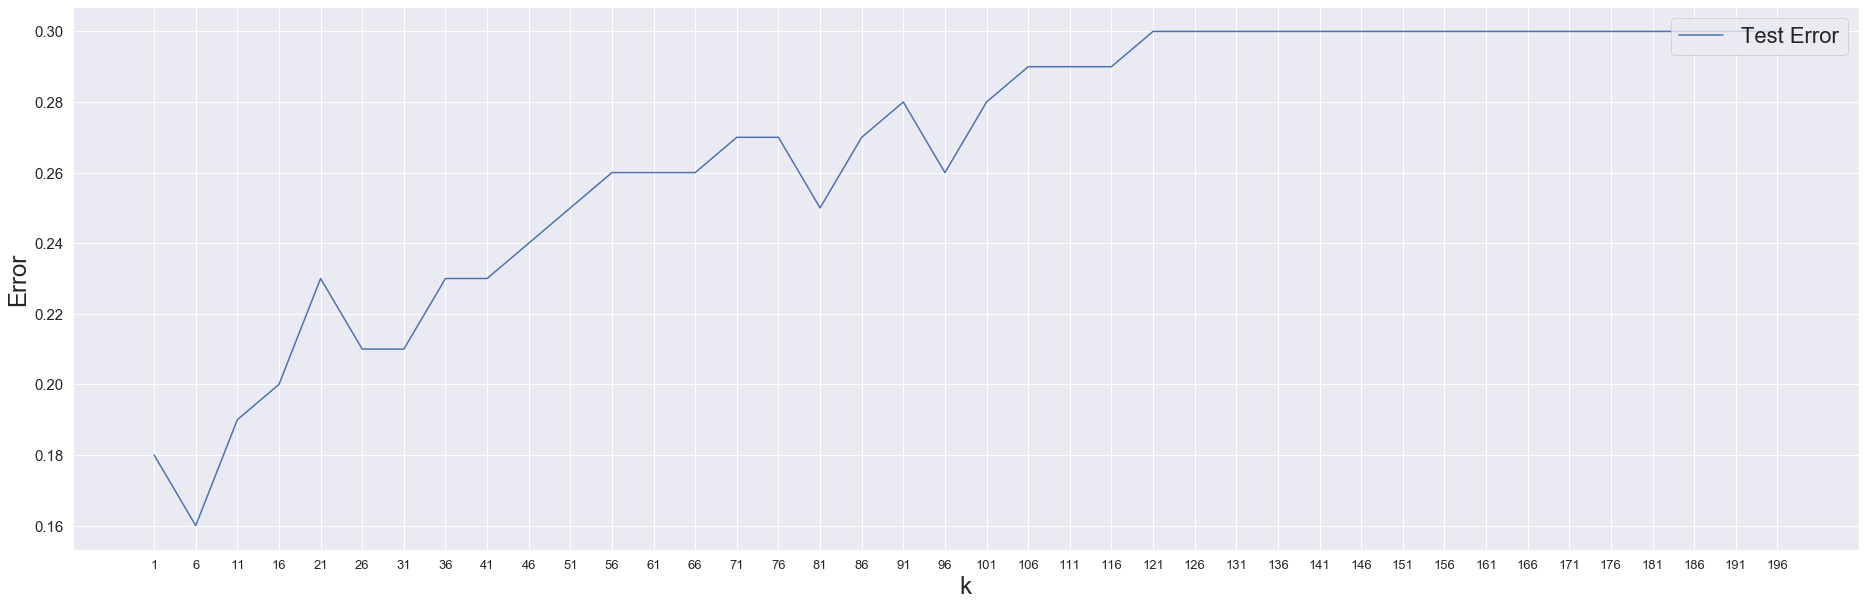

In [47]:
plt.plot(k2,test_score_mb,label="Test Error")
plt.xticks(k2,fontsize=13)
plt.yticks(fontsize=15)
plt.xlabel("k")
plt.ylabel("Error")
plt.legend(loc='upper right')

In [48]:
k2[np.argwhere(test_score_mb==min(test_score_mb)) ]

array([[6]])

k=6 produces test error of 0.16

In [49]:
error_df=error_df.append({"Test_Error":0.08,"Distance_metric":"Manhattan with p=0.3","k":5},ignore_index=True)


In [50]:
error_df=error_df.append({"Test_Error":min(testing_error_cheby),"Distance_metric":"chebyshev","k":5},ignore_index=True)

In [51]:
error_df

,Test_Error,Distance_metric,k
0,0.08,Euclidean,3
1,0.11,Manhattan,5
2,0.08,Manhattan with p=0.3,5
3,0.08,chebyshev,5


In [52]:
error_df=error_df.append({"Test_Error":0.16,"Distance_metric":"Mahalanobis","k":6},ignore_index=True)
error_df

,Test_Error,Distance_metric,k
0,0.08,Euclidean,3
1,0.11,Manhattan,5
2,0.08,Manhattan with p=0.3,5
3,0.08,chebyshev,5
4,0.16,Mahalanobis,6


### Use weighted voting with Euclidean, Manhattan, and Chebyshev distances and report the best test errors when k ∈ {1, 6, 11, 16, . . . , 196}. 


In [53]:
k2

array([  1,   6,  11,  16,  21,  26,  31,  36,  41,  46,  51,  56,  61,
        66,  71,  76,  81,  86,  91,  96, 101, 106, 111, 116, 121, 126,
       131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191,
       196])

#### Euclidean

In [54]:
classifier_eucl = KNeighborsClassifier(metric="euclidean",
                           weights='distance')

test_weighted_eucl = []

for i in k2:
    classifier_eucl.set_params(n_neighbors=i)
    classifier_eucl.fit(X_train, y_train)
    y_pred=classifier_eucl.predict(X_test)
    test_weighted_eucl.append(mean_squared_error(y_pred, y_test))
    


In [55]:
min(test_weighted_eucl)

0.1

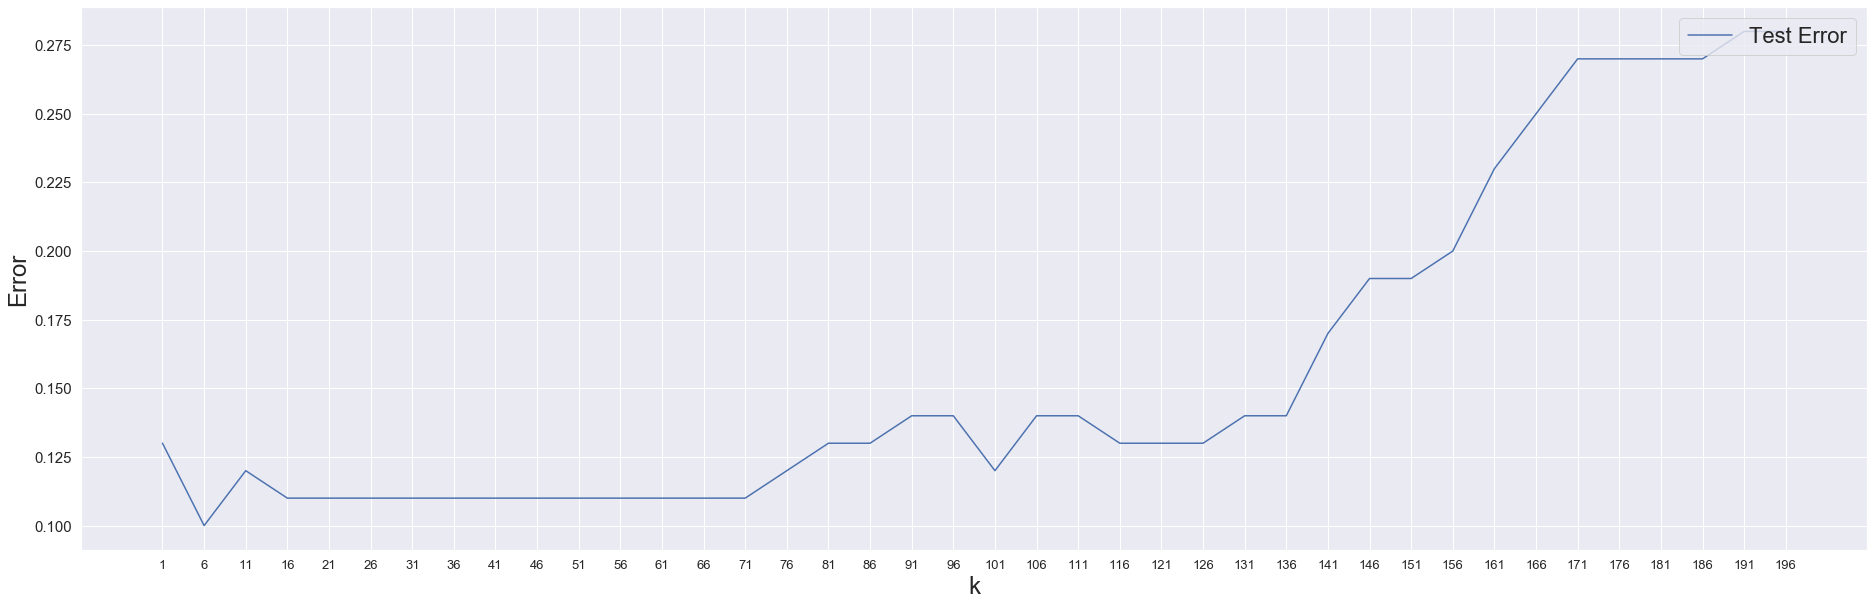

In [56]:
plt.plot(k2,test_weighted_eucl,label="Test Error")
plt.xticks(k2,fontsize=13)
plt.yticks(fontsize=15)
plt.xlabel("k")
plt.ylabel("Error")
plt.legend(loc='upper right')

In [57]:
k2[np.argwhere(test_weighted_eucl==min(test_weighted_eucl))]

array([[6]])

In [58]:
print("k=6 produces test error of 0.1 for Euclidean weighted distance")

k=6 produces test error of 0.1 for Euclidean weighted distance


#### Manhattan

In [59]:
classifier_manh = KNeighborsClassifier(metric="manhattan",
                           weights='distance')

test_weighted_manh = []

for i in k2:
    classifier_manh.set_params(n_neighbors=i)
    classifier_manh.fit(X_train, y_train)
    y_pred=classifier_manh.predict(X_test)
    test_weighted_manh.append(mean_squared_error(y_pred, y_test))
    

In [60]:
min(test_weighted_manh)

0.1

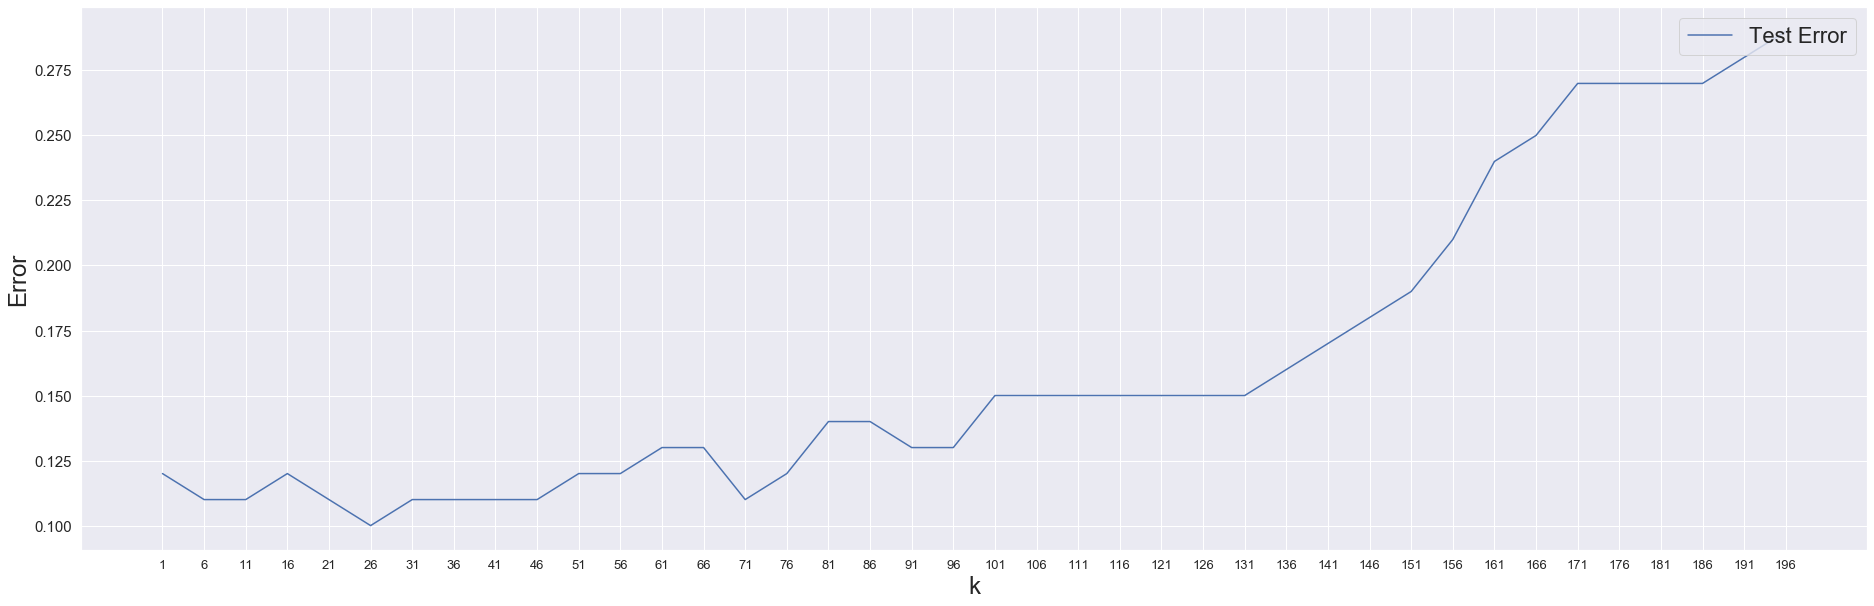

In [61]:
plt.plot(k2,test_weighted_manh,label="Test Error")
plt.xticks(k2,fontsize=13)
plt.yticks(fontsize=15)
plt.xlabel("k")
plt.ylabel("Error")
plt.legend(loc='upper right')

In [62]:
k2[np.argwhere(test_weighted_manh==min(test_weighted_manh))]

array([[26]])

In [63]:
print("k=26 produces test error of 0.1 for Manhattan weighted distance")

k=26 produces test error of 0.1 for Manhattan weighted distance


#### Chebyshev

In [64]:
classifier_cheby = KNeighborsClassifier(metric="manhattan",
                           weights='distance')

test_weighted_cheby = []

for i in k2:
    classifier_cheby.set_params(n_neighbors=i)
    classifier_cheby.fit(X_train, y_train)
    y_pred=classifier_cheby.predict(X_test)
    test_weighted_cheby.append(mean_squared_error(y_pred, y_test))
    

In [65]:
min(test_weighted_cheby)

0.1

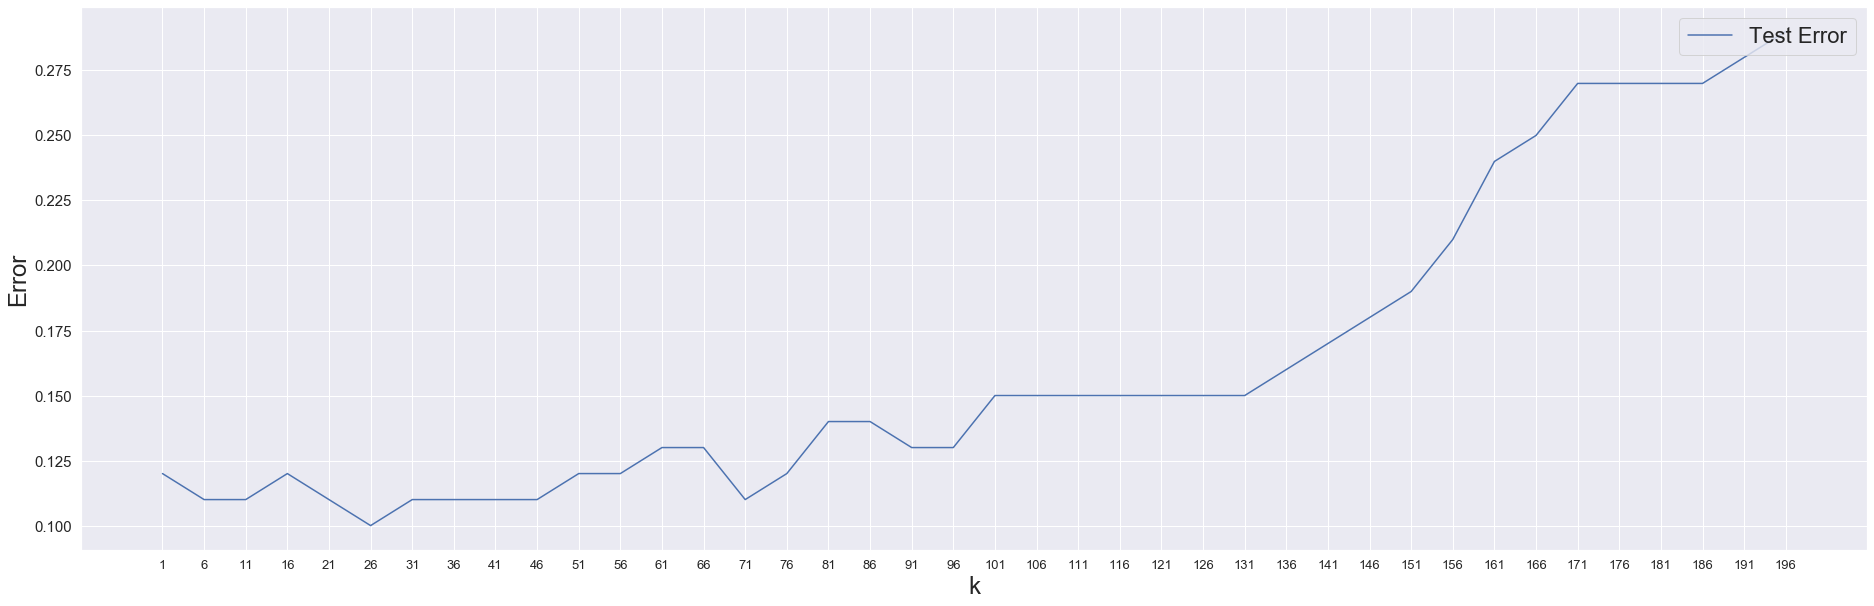

In [66]:
plt.plot(k2,test_weighted_cheby,label="Test Error")
plt.xticks(k2,fontsize=13)
plt.yticks(fontsize=15)
plt.xlabel("k")
plt.ylabel("Error")
plt.legend(loc='upper right')

In [67]:
k2[np.argwhere(test_weighted_cheby==min(test_weighted_cheby))]

array([[26]])

In [68]:
print("k=26 produces test error of 0.1 for Chebyshev weighted distance")

k=26 produces test error of 0.1 for Chebyshev weighted distance


In [69]:
print("Summary")
print("k=6 produces test error of 0.1 for Euclidean weighted distance")
print("k=26 produces test error of 0.1 for Manhattan weighted distance")
print("k=26 produces test error of 0.1 for Chebyshev weighted distance")


Summary
k=6 produces test error of 0.1 for Euclidean weighted distance
k=26 produces test error of 0.1 for Manhattan weighted distance
k=26 produces test error of 0.1 for Chebyshev weighted distance


#### What is the lowest training error rate you achieved in this homework? 

The lowest trainig error would be 0 when k=1 as it will choose itself as the closest neighbour and never makes the mistake.

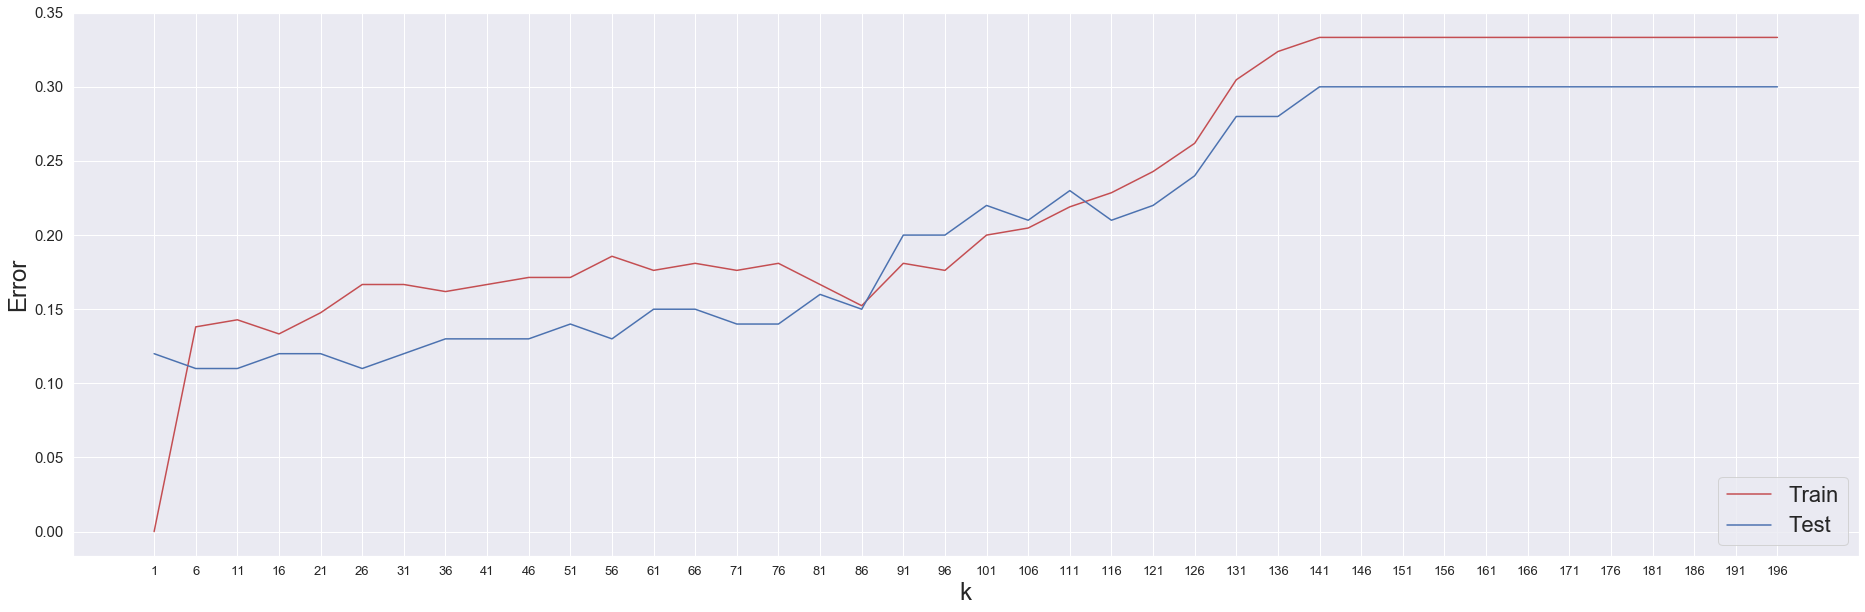

In [73]:
k2=np.arange(1,197,5)
training_error2=[]
testing_error2=[]

for i in k2:
    train_err,test_err,_=KNN(i,"manhattan")
    training_error2.append(train_err)
    testing_error2.append(test_err)
    
plt.rcParams["figure.figsize"] = (32,10)
plt.plot(k2,training_error2,"r",label="Train")
plt.plot(k2,testing_error2,label="Test")
plt.xticks(k2,fontsize=13)
plt.yticks(fontsize=15)
plt.xlabel("k")
plt.ylabel("Error")
plt.legend(loc='lower right')